## Exploración del corpus

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

##### Descarga de los datos

In [2]:
df = pd.read_json('Sports_and_Outdoors_5.json', lines = True)

In [3]:
df.shape

(296337, 9)

In [4]:
df = df.sample(1000, random_state = 17)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
190306,B003J80XQG,"[0, 0]",5,These lids are great for my 24 oz Tervis tumbl...,"05 31, 2013",A3NXOKJ2HEV7OU,Airbare,Great lids,1369958400
29855,B000BT0Z9Q,"[0, 2]",3,this piece of equipment seems like it is going...,"07 9, 2009",A1PSD2SHO6R8CD,Dennis W. Okeefe,It's solid,1247097600
168506,B002UK9WK2,"[1, 2]",5,This whistle is loud! Louder then the original...,"08 17, 2012",A27Y4OEC9MD9PA,George Wey,Fox Sonik Blast,1345161600
206628,B0046O0PEC,"[0, 2]",3,Kinda just takes up space in my pack. Don't r...,"02 12, 2014",A29IDH9HRAPN24,Kevin Millar,didn't really need this,1392163200
251996,B006JYHHL6,"[0, 0]",5,I bought this for my son for Christmas and onc...,"07 7, 2013",ALUF42HEPEAZO,James Mayfield,Bought for my son,1373155200


##### Cardinalidad del vocabulario

In [5]:
import nltk
from nltk import TreebankWordTokenizer

In [6]:
# Tokenizamos cada review del dataset en frases
df_tokenized = df.apply(lambda row: nltk.sent_tokenize(row['reviewText'], language = 'english'), axis=1)
df_tokenized.head()

190306    [These lids are great for my 24 oz Tervis tumb...
29855     [this piece of equipment seems like it is goin...
168506    [This whistle is loud!, Louder then the origin...
206628    [Kinda just takes up space in my pack., Don't ...
251996    [I bought this for my son for Christmas and on...
dtype: object

In [7]:
# Tokenizamos cada frase en palabras y las almacenamos en una lista
tokenizer = TreebankWordTokenizer()

words = list()
for rev in df_tokenized.tolist():
    for sent in rev:
        for idx, word in enumerate(tokenizer.tokenize(sent)):
            words.append(word.lower())

In [9]:
print("La cardinalidad del vocabulario es: " + str(len(set(words))))

La cardinalidad del vocabulario es: 8800


##### Distribución de las reviews

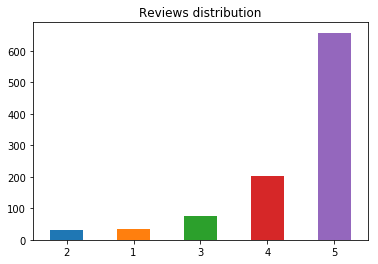

In [10]:
df['overall'].value_counts(ascending = True).plot('bar', title = 'Reviews distribution', rot = 0)

Como podemos comprobar, hay muchas nás reviews de 5 estrellas que de las demás, por lo que, hagamos una clasificación binaria o multiclase, vamos a tener un problema de desbalanceo

##### Número de reviews positivas y negativas

Vamos a entender reviews positivas comoo aquellas que tienen 3 o más estrellas y como reviews negativas aquellas con 1 o 2 estrellas

In [11]:
print("Número de reviews positivas: " + str((df['overall'] >= 3).sum()))
print("Número de reviews negativas: " + str((df['overall'] < 3).sum()))

Número de reviews positivas: 934
Número de reviews negativas: 66


##### N-grams más frecuentes

In [12]:
from nltk import ngrams
from nltk.probability import FreqDist

In [13]:
bigrams_ = list(ngrams(words, 2))
trigrams_ = list(ngrams(words, 3))
tetragrams_ = list(ngrams(words, 4))

In [14]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)
ttg_freq = FreqDist(tetragrams_)

In [15]:
bg_freq.most_common(10)

[(('.', 'i'), 992),
 (('.', 'the'), 426),
 (('.', 'it'), 385),
 ((',', 'but'), 318),
 (('of', 'the'), 309),
 ((',', 'and'), 295),
 (('in', 'the'), 293),
 (('.', 'this'), 280),
 ((',', 'i'), 257),
 (('it', 'is'), 254)]

In [16]:
tg_freq.most_common(10)

[(('.', 'this', 'is'), 99),
 (('.', 'i', 'have'), 93),
 (('.', 'it', "'s"), 86),
 (('.', 'it', 'is'), 73),
 (('this', 'is', 'a'), 73),
 (('i', 'do', "n't"), 72),
 (('&', '#', '34'), 70),
 (('#', '34', ';'), 70),
 ((',', 'but', 'i'), 58),
 (('.', 'if', 'you'), 57)]

In [17]:
ttg_freq.most_common(10)

[(('&', '#', '34', ';'), 70),
 (('.', 'this', 'is', 'a'), 40),
 (('.', 'i', 'bought', 'this'), 30),
 (('!', '!', '!', '!'), 29),
 (('.', 'i', 'do', "n't"), 22),
 (('for', 'the', 'price', '.'), 22),
 (('this', 'is', 'a', 'great'), 21),
 (('out', 'of', 'the', 'box'), 19),
 (('.', 'this', 'is', 'the'), 15),
 (('.', 'if', 'you', 'have'), 15)]

In [18]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

ttg_freq_most_common = ttg_freq.most_common(10)
ttgs_ = [str(ttg[0]) for ttg in ttg_freq_most_common]
ttgs_f_ = [ttg[1] for ttg in ttg_freq_most_common]

In [19]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))
ttgs_f_, ttgs_ = zip(*sorted(zip(ttgs_f_, ttgs_)))

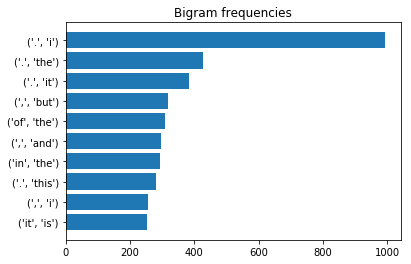

In [20]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

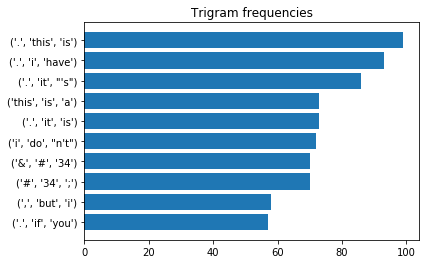

In [21]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

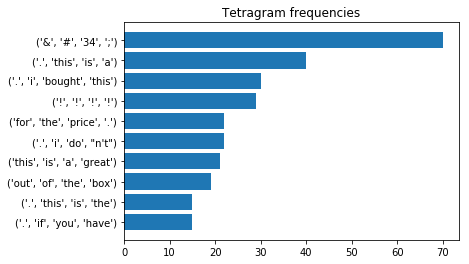

In [22]:
plt.barh(ttgs_, ttgs_f_)
plt.title('Tetragram frequencies')
plt.show()

Comoo no hemos realizado ningún preprocesado previo (se hará en el siguiente apartado), vemos que muchos n-gramas contienen signos de puntuación o palabras que no aportan mucho.

Una manera de corregir esto sería eliminar estos mismos tokens del vocabulario.

##### Nubes de palabras

In [23]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [24]:
sw_list = stopwords.words('english')

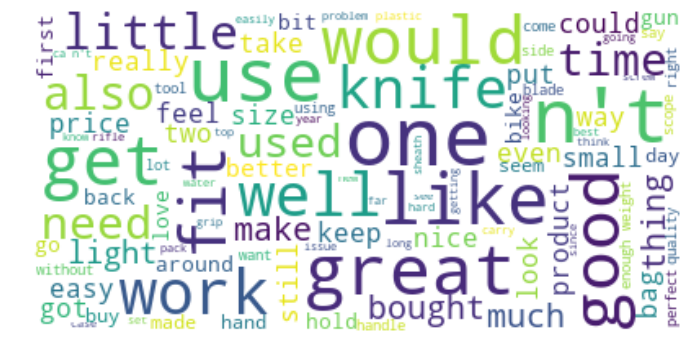

In [25]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white", stopwords = sw_list).generate(' '.join(words))
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Con afán de mostrar palabras algo más representativas, se ha eliminado una lista de stop words predefinida previamente descargada.
Aún así vemos que se podrían seguir eliminando más palabras como "n´t"o "get", que no aportan demasiado.

##### Visualización de word embeddings

In [29]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [30]:
file2write = open("corpues.txt",'w')
file2write.write(df['reviewText'].str.cat().lower())
file2write.close()

In [31]:
corpues = LineSentence('corpues.txt')

In [32]:
w2v = Word2Vec(min_count = 1, vector_size = 30, window = 5, sg = 1)

In [33]:
w2v.build_vocab(corpues)

In [34]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v.wv)))

Vocabulario compuesto por 12995 palabras


In [35]:
w2v.train(corpues, total_examples = w2v.corpus_count, epochs = 100)

(6479827, 8593200)

In [36]:
w2v.wv.most_similar('bag')

[('bag),', 0.8023176789283752),
 ('(every', 0.8018515706062317),
 ('crush', 0.7882811427116394),
 ('(everyday', 0.7762807011604309),
 ('(get', 0.7733539342880249),
 ('me.-', 0.7680782079696655),
 ('carry)', 0.7629523277282715),
 ('messenger', 0.7563833594322205),
 ('winner!', 0.7508771419525146),
 ('gym', 0.7392184734344482)]

In [37]:
w2v.wv.most_similar('hockey')

[('balls,', 0.8701867461204529),
 ('practical.', 0.8556901812553406),
 ('for.they', 0.8436243534088135),
 ('realistic', 0.8182928562164307),
 ("'specific'", 0.8089085221290588),
 ('treatments', 0.8061724901199341),
 ('careful,', 0.7886964082717896),
 ('preparingfor', 0.7854747772216797),
 ('what', 0.7831867337226868),
 ('about.just', 0.7807639837265015)]

In [38]:
w2v.wv.most_similar('good')

[('value', 0.8106529116630554),
 ('reinforce', 0.8101112246513367),
 ('loocking,', 0.7953618764877319),
 ('non-fire', 0.7916963696479797),
 ('price.sighted', 0.7916694283485413),
 ('breakfast,', 0.7880999445915222),
 ('thing.i', 0.7771232724189758),
 ('scratch-made', 0.7694185972213745),
 ('headed', 0.7651877403259277),
 ('purchase.these', 0.7625041007995605)]

In [39]:
w2v.wv.most_similar('soccer')

[('basketball.', 0.8256525993347168),
 ('cones,', 0.8184390068054199),
 ('august,', 0.7928507924079895),
 ('roads', 0.7689694762229919),
 ('weekends', 0.7667609453201294),
 ('happier...i', 0.7498971819877625),
 ('country', 0.7444862723350525),
 ('i.', 0.7409131526947021),
 ('also.its', 0.7344778180122375),
 ('kids.', 0.7287464737892151)]

In [40]:
keys = ['bag', 'hockey', 'good', 'soccer']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v.wv.most_similar(word, topn = 10):
        words.append(similar_word)
        embeddings.append(w2v.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [41]:
from sklearn.manifold import TSNE

tsne_model_2d = TSNE(perplexity = 15, n_components = 2, init = 'pca', n_iter = 3500, random_state = 32)

In [42]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [43]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

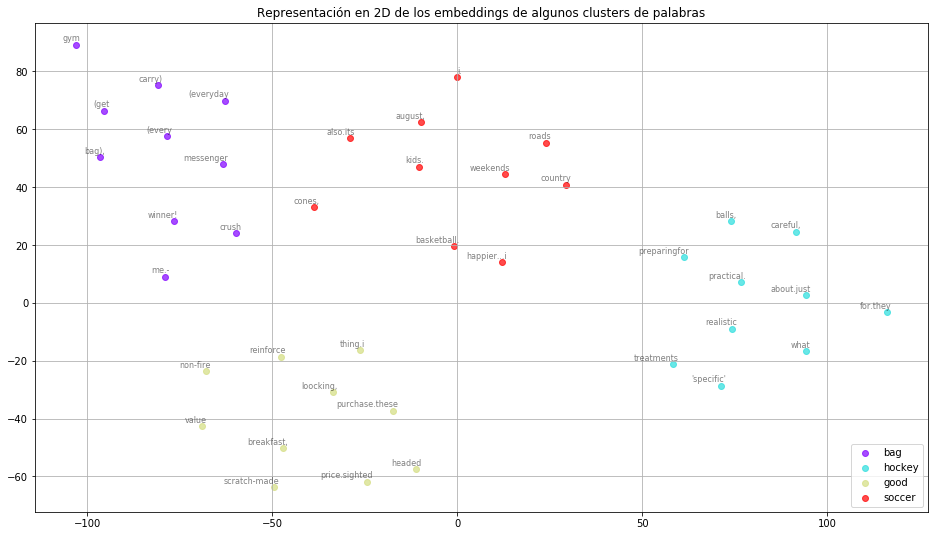

In [44]:
import matplotlib.cm as cm

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a = 0.7):
    plt.figure(figsize = (16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

##### Conclusiones

Como podemos ver en la representación de word embbedings, cada conjunto de palabras similares está separada en grupos bastante diferenciables, no parece que haya capturado del todo la semántica.
Aunque sí es cierto que, para algunas palabras (bag-gym) o (soccer-basketball), parece que empieza a capturar la semántica, para otras no se le encuentra un sentido a simple vista.

Esto puede debarse, en parte, a la falta de un preprocesado previo, ya que se cuelan palabras con signos de interrogación, signos de puntuación, etc, y sería previsible esperar que, utilizando técnicas de preprocesado previamente, mejrararn los resultados.